# Photon Count for Exozodiacal Dust Proposal

## NIRISS AMI Model

In [32]:
import dLuxWebbpsf as dlW
import matplotlib.pyplot as plt
import zodiax as zdx
import jax.numpy as np
import tqdm.notebook as tqdm

In [33]:
tel = dlW.NIRISS(
    filt='F480M',
    pupil_mask='MASK_NRM',
    radial_orders = [0, 1]
)

In [34]:
# Marginal parameters
params = [
    "flux",
    "wavelengths",
    "position",
    # "pupil.coefficients",
]

# We can use the shape_dict to force the shape of the perturbing parameter to be a scalar,
# resulting in the model constraining the mean value of the wavelengths array.
shape_dict = {'wavelengths': 1}

# Define our likelihood function and bind it to our covariance function
# We use poissonian here because we are assuming photon noise is our dominant noise source
calc_fim = lambda model, parameters: zdx.self_fisher_matrix(model, parameters, zdx.poiss_loglike, shape_dict=shape_dict)
fim_fn = zdx.filter_jit(calc_fim)

# Compile
fim_fn(tel, params)

fluxes = np.logspace(8, 12, 10)

In [35]:
fims, stds = [], []

for idx, flux in enumerate(tqdm.tqdm(fluxes)):
    model = tel.set("flux", flux)
    fim = fim_fn(model, params)
    fims.append(fim)

fims = np.array(fims)

  0%|          | 0/10 [00:00<?, ?it/s]

## Plotting

ok this is wrong because the position is like two parameters but gimme a break

In [41]:
def plot_fim(param: str):
    idx = params.index(param)
    fig, ax = plt.subplots()
    ax.loglog(fluxes, fims[:, idx], marker='o')
    ax.set(title=param, xlabel="Flux", ylabel=f"Fisher Information of {param}")
    plt.show()

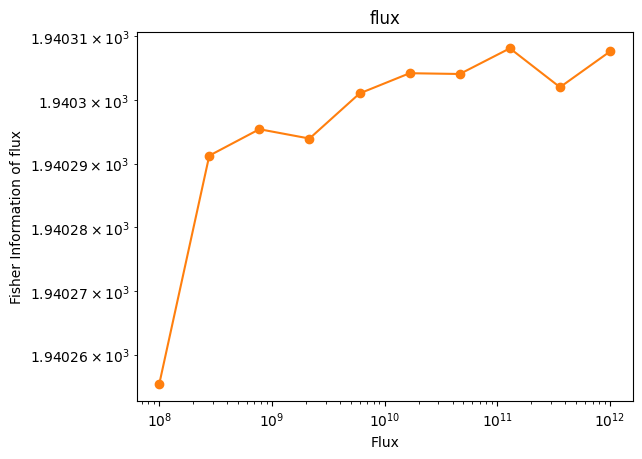

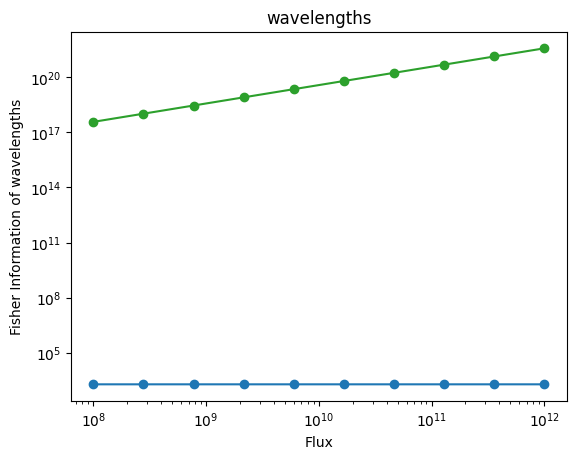

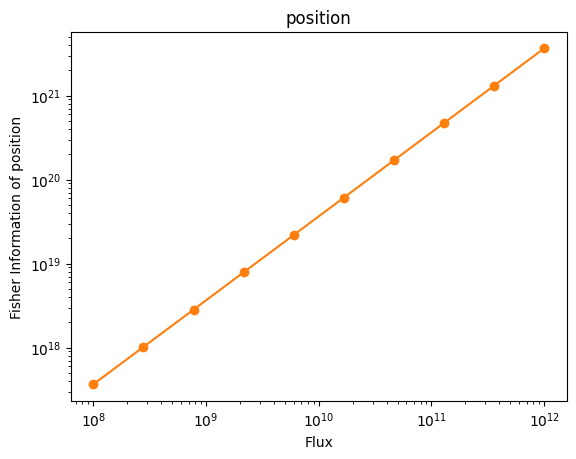

In [43]:
for param in params:
    plot_fim(param)